### Lab3 reference answer

---
### ** >>> Exercise 1 (Take home): **  
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)


In [1]:
## Prepare data
import pandas as pd

### training data
anger_train = pd.read_csv("data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)
display(train_df)

,id,text,emotion,intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896
...,...,...,...,...
3608,40781,@VivienLloyd Thank you so much! Just home - st...,sadness,0.104
3609,40782,Just put the winter duvet on ☃️❄️🌬☔️,sadness,0.104
3610,40783,@SilkInSide @TommyJoeRatliff that's so pretty!...,sadness,0.088
3611,40784,@BluesfestByron second artist announcement loo...,sadness,0.083


In [2]:
### testing data
anger_test = pd.read_csv("data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
display(test_df)

,id,text,emotion,intensity
0,10857,@ZubairSabirPTI pls dont insult the word 'Molna',anger,0.479
1,10858,@ArcticFantasy I would have almost took offens...,anger,0.458
2,10859,@IllinoisLoyalty that Rutgers game was an abom...,anger,0.562
3,10860,@CozanGaming that's what lisa asked before she...,anger,0.500
4,10861,Sometimes I get mad over something so minuscul...,anger,0.708
...,...,...,...,...
342,40855,Common app just randomly logged me out as I wa...,sadness,0.833
343,40856,"I'd rather laugh with the rarest genius, in be...",sadness,0.688
344,40857,If you #invest in my new #film I will stop ask...,sadness,0.458
345,40858,"Just watched Django Unchained, Other people ma...",sadness,0.333


Top 30 training set word frequency:
['the' 'to' 'and' 'you' 'of' 'is' 'it' 'in' 'that' 'my' 'for' 'on' 'be'
 'me' 'this' 'so' 'have' 'not' 'just' 'but' 'with' 'at' 'can' 'all' 'like'
 'are' 'your' 'was' 'when' 'if']


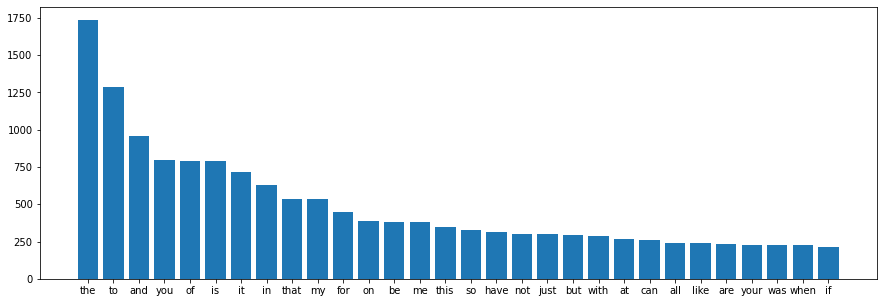

In [3]:
# Answer here
## Plot word frequency for Top 30 words in train dataset
import numpy as np

import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
train_count_vect_top30 = CountVectorizer(max_features=30)
train_text = train_count_vect_top30.fit_transform(train_df["text"])

train_word_frequency = [sum(i) for i in train_text.toarray().T]
train_word_index = sorted(range(len(train_word_frequency)),reverse=True, 
                          key=lambda k: train_word_frequency[k])
train_word_rank = np.array(train_count_vect_top30.get_feature_names())[train_word_index]

plt.figure(figsize=(15,5))
plt.bar(train_word_rank,sorted(train_word_frequency,reverse=True))
print("Top 30 training set word frequency:")
print(train_word_rank)

Top 30 testing set word frequency:
['the' 'to' 'and' 'it' 'of' 'you' 'is' 'in' 'for' 'that' 'my' 'on' 'be'
 'me' 'so' 'was' 'can' 'all' 'at' 'have' 'are' 'just' 'with' 'but' 'get'
 'like' 'not' 'this' 'up' 'your']


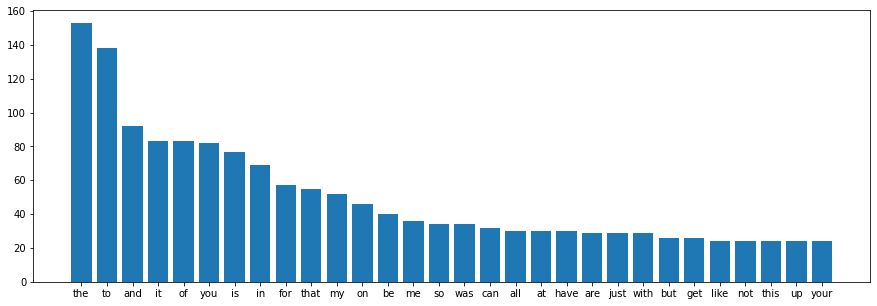

In [4]:
## Plot word frequency for Top 30 words in train dataset
test_count_vect_top30 = CountVectorizer(max_features=30)
test_text = test_count_vect_top30.fit_transform(test_df["text"])

test_word_frequency = [sum(i) for i in test_text.toarray().T]
test_word_index = sorted(range(len(test_word_frequency)),reverse=True, 
                         key=lambda k: test_word_frequency[k])
test_word_rank = np.array(test_count_vect_top30.get_feature_names())[test_word_index]

plt.figure(figsize=(15,5))
plt.bar(test_word_rank,sorted(test_word_frequency,reverse=True))
print("Top 30 testing set word frequency:")
print(test_word_rank)

---
### ** >>> Exercise 2 (Take home): **  
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [5]:
# Answer here
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
# build analyzers (bag-of-words)
TF_IDF_1000 = TfidfVectorizer(max_features=1000, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
TF_IDF_1000.fit(train_df['text'])

train_data_BOW_features_1000 = TF_IDF_1000.transform(train_df['text'])

## check dimension
train_data_BOW_features_1000.toarray()
feature_names_1000 = TF_IDF_1000.get_feature_names()
feature_names_1000[100:110]

/home/xu0494akk/miniconda3/envs/py36/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:489: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


['awful', 'b', 'baby', 'back', 'bad', 'ball', 'balls', 'bb18', 'bc', 'bday']

---
### ** >>> Exercise 3 (Take home): **  
Can you interpret the results above? What do they mean?

In [34]:
# Answer here
'''
The work we are doing here is to input a text, and then output one of four emotions.
And the dataset have already labeled by a human, so we have already know the 'true' result.

This is why we can have the 'true label'(or so-called ground-truth).

Next, we want to predict the unseen text, so we separate the dataset into 'train' and 'test'.
In the training dataset, since the model has already seen the label(answer), so the prediction accuracy will be high.
However, test data is the data we want to validate the power of the model, so there will be lots of prediction errors.

Now we can start to see the confusion matrix:

           anger   [[57    18  6   3]
 predict   fear    [16     76  9   9]
           joy     [ 6     9   56  8]
           sadness [ 7     13  7  47]]
                    anger fear joy sadness
                        True

As we have known, y_test.shape:  (347,) which means we have 347 emotion labels(you can add all numbers in the confusion matrix and get the result which equals 347).

The left top 57 means the model predicts 57 anger labels, which are also really anger labels.
The next one 18 means the model predicts 18 anger labels, but which are truly fear labels, and so on.
So we can know the results in the slash from top left to bottom right are correct predictions, and the others are false predictions.

'''

"\nThe work we are doing here is to input a text, and then output one of four emotions.\nAnd the dataset have already labeled by a human, so we have already know the 'true' result.\n\nThis is why we can have the 'true label'(or so-called ground-truth).\n\nNext, we want to predict the unseen text, so we separate the dataset into 'train' and 'test'.\nIn the training dataset, since the model has already seen the label(answer), so the prediction accuracy will be high.\nHowever, test data is the data we want to validate the power of the model, so there will be lots of prediction errors.\n\nNow we can start to see the confusion matrix:\n\n           anger   [[57    18  6   3]\n predict   fear    [16     76  9   9]\n           joy     [ 6     9   56  8]\n           sadness [ 7     13  7  47]]\n                    anger fear joy sadness\n                        True\n\nAs we have known, y_test.shape:  (347,) which means we have 347 emotion labels(you can add all numbers in the confusion matrix

---
### ** >>> Exercise 4 (Take home): **  
Build a model using a ```Naive Bayes``` model and train it. What are the testing results? 

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

In [35]:
# Prepare the input to the naive_bayes model
# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
BOW_500.fit(train_df['text'])
train_data_BOW_features_500 = BOW_500.transform(train_df['text'])

# for a classificaiton problem, you need to provide both training & testing data
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

In [36]:
# Answer here
#naive bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


NB = GaussianNB()
NB.fit(X_train.toarray(), y_train)
## predict!
y_train_pred = NB.predict(X_train.toarray())
y_test_pred = NB.predict(X_test.toarray())

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))

print(classification_report(y_true=y_test, y_pred=y_test_pred))

training accuracy: 0.76
testing accuracy: 0.65
              precision    recall  f1-score   support

       anger       0.53      0.73      0.61        84
        fear       0.79      0.59      0.68       110
         joy       0.65      0.81      0.72        79
     sadness       0.69      0.47      0.56        74

    accuracy                           0.65       347
   macro avg       0.66      0.65      0.64       347
weighted avg       0.67      0.65      0.65       347



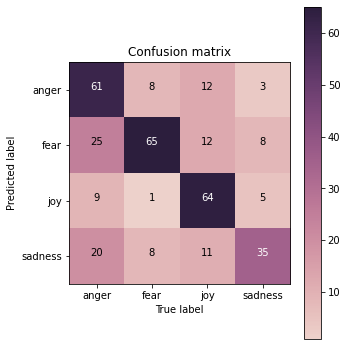

[[61  8 12  3]
 [25 65 12  8]
 [ 9  1 64  5]
 [20  8 11 35]]


In [37]:
#Plot the confusion matrix
# Funciton for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'True label',
           ylabel = 'Predicted label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()
    
cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred)
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')
print(cm)

---
### ** >>> Exercise 5 (Take home): **  

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

In [38]:
# Answer here
'''
Result & Difference:

- Decision tree 
training accuracy: 0.99
testing accuracy: 0.68

           anger   [[57    18  6   3]
 predict   fear    [16     76  9   9]
           joy     [ 6     9   56  8]
           sadness [ 7     13  7  47]]
                    anger fear joy sadness
                        True

Pros:
(1) Easy to understand(Decision tree is discriminative model)
(2) Easy to generate rules
Cons:
(1) Decision tree suffer from overfitting(high training accuracy but low testing accuracy)

- Naive_bayes model 

training accuracy: 0.76
testing accuracy: 0.65

           anger   [[61    8   12    3]
 predict   fear    [25    65   12    8]
           joy     [ 9     1   64    5]
           sadness [20     8   11   35]]            
                    anger fear joy sadness
                        True

Pros:
(1) It is highly scalable with the number of predictors and data points
(2) It is fast and can be used to make real-time predictions
Cons:
(1) Naive Bayes assumes that all predictors (or features) are independent
(2) Its estimations can be wrong in some cases, so we shouldn’t take its probability outputs very seriously
''' 

'\nResult & Difference:\n\n- Decision tree \ntraining accuracy: 0.99\ntesting accuracy: 0.68\n\n           anger   [[57    18  6   3]\n predict   fear    [16     76  9   9]\n           joy     [ 6     9   56  8]\n           sadness [ 7     13  7  47]]\n                    anger fear joy sadness\n                        True\n\nPros:\n(1) Easy to understand(Decision tree is discriminative model)\n(2) Easy to generate rules\nCons:\n(1) Decision tree suffer from overfitting(high training accuracy but low testing accuracy)\n\n- Naive_bayes model \n\ntraining accuracy: 0.76\ntesting accuracy: 0.65\n\n           anger   [[61    8   12    3]\n predict   fear    [25    65   12    8]\n           joy     [ 9     1   64    5]\n           sadness [20     8   11   35]]            \n                    anger fear joy sadness\n                        True\n\nPros:\n(1) It is highly scalable with the number of predictors and data points\n(2) It is fast and can be used to make real-time predictions\nCo

---
### ** >>> Exercise 6 (Take home): **  

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below.(Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?
<table><tr>
    <td><img src="/home/xu0494akk/dm/DM2022-Lab2-Homework-main/pics/pic3.png" style="width: 300px;"/> </td>
    <td><img src="/home/xu0494akk/dm/DM2022-Lab2-Homework-main/pics/pic4.png" style="width: 300px;"/> </td>
</tr></table>

In [39]:
# 1. Prepare data(X,y)
import tensorflow.keras as keras

# standardize name (X, y) 
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

In [40]:
#2. Deal with categary label (y)
## deal with label (string -> one-hot)

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_train)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)

print('\n\n## After convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)




## After convert
y_train[0:4]:
 [[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]

y_train.shape:  (3613, 4)
y_test.shape:  (347, 4)


In [41]:
#3. Build model
# I/O check
input_shape = X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

input_shape:  500
output_shape:  4


In [12]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 500)]             0         
_________________________________________________________________
dense (Dense)                (None, 64)                32064     
_________________________________________________________________
re_lu (ReLU)                 (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
re_lu_1 (ReLU)               (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 260       
_________________________________________________________________
softmax (Softmax)            (None, 4)                 0     

In [13]:
# 4. train
from tensorflow.keras.callbacks import CSVLogger

csv_logger = CSVLogger('./logs/training_log.csv')

# training setting
epochs = 100
batch_size = 256

# training!
history = model.fit(X_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    callbacks=[csv_logger],
                    validation_data = (X_test, y_test))
print('training finish')

Epoch 1/100


/home/xu0494akk/miniconda3/envs/py36/lib/python3.6/site-packages/tensorflow/python/framework/indexed_slices.py:449: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/model/dense/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/model/dense/embedding_lookup_sparse/Reshape:0", shape=(None, 64), dtype=float32), dense_shape=Tensor("gradient_tape/model/dense/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)


15/15 [==============================] - 1s 15ms/step - loss: 1.3701 - accuracy: 0.3056 - val_loss: 1.3611 - val_accuracy: 0.3516
Epoch 2/100
15/15 [==============================] - 0s 4ms/step - loss: 1.3186 - accuracy: 0.3720 - val_loss: 1.3366 - val_accuracy: 0.3890
Epoch 3/100
15/15 [==============================] - 0s 5ms/step - loss: 1.2602 - accuracy: 0.4921 - val_loss: 1.2973 - val_accuracy: 0.4409
Epoch 4/100
15/15 [==============================] - 0s 5ms/step - loss: 1.1702 - accuracy: 0.5848 - val_loss: 1.2306 - val_accuracy: 0.4813
Epoch 5/100
15/15 [==============================] - 0s 5ms/step - loss: 1.0335 - accuracy: 0.6621 - val_loss: 1.1285 - val_accuracy: 0.5533
Epoch 6/100
15/15 [==============================] - 0s 5ms/step - loss: 0.8618 - accuracy: 0.7440 - val_loss: 1.0134 - val_accuracy: 0.6052
Epoch 7/100
15/15 [==============================] - 0s 5ms/step - loss: 0.6941 - accuracy: 0.7877 - val_loss: 0.9116 - val_accuracy: 0.6513
Epoch 8/100
15/15 [=====

In [14]:
#Let's take a look at the training log
training_log = pd.DataFrame()
training_log = pd.read_csv("/logs/training_log.csv")
training_log

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.305563,1.370146,0.351585,1.361140
1,1,0.371990,1.318637,0.389049,1.336565
2,2,0.492112,1.260190,0.440922,1.297292
3,3,0.584833,1.170178,0.481268,1.230556
4,4,0.662054,1.033542,0.553314,1.128463
...,...,...,...,...,...
95,95,0.983947,0.040646,0.674352,1.796013
96,96,0.980902,0.041047,0.657061,1.847979
97,97,0.982286,0.042918,0.662824,1.854054
98,98,0.980626,0.042380,0.659942,1.845434


In [20]:
training_log["loss"].to_pickle("./logs/train_loss.pkl") 
training_log["val_loss"].to_pickle("./logs/val_loss.pkl") 

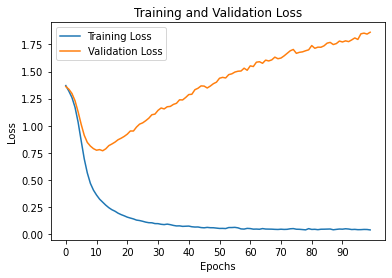

In [21]:
# Answer here
from pickle import load
from matplotlib.pylab import plt
from numpy import arange
 
# Load the training and validation loss dictionaries
train_loss = load(open('./logs/train_loss.pkl', 'rb'))
val_loss = load(open('./logs/val_loss.pkl', 'rb'))
 
# Retrieve each dictionary's values
train_loss_values = train_loss.values
val_loss_values = val_loss.values
 
# Generate a sequence of integers to represent the epoch numbers
epochs_number = range(0, epochs)
 
# Plot and label the training and validation loss values
plt.plot(epochs_number, train_loss_values, label='Training Loss')
plt.plot(epochs_number, val_loss_values, label='Validation Loss')
 
# Add in a title and axes labels
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
 
# Set the tick locations
plt.xticks(arange(0, epochs, 10))
 
# Display the plot
plt.legend(loc='best')
plt.show()


---
### ** >>> Exercise 7 (Take home): **  

Now, we have the word vectors, but our input data is a sequence of words (or say sentence). 
How can we utilize these "word" vectors to represent the sentence data and train our model?


In [54]:
#load pretrain model
from gensim.models import KeyedVectors

## Note: this model is very huge, this will take some time ...
model_path = "GoogleNews-vectors-negative300.bin.gz"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print('load ok')

load ok


In [55]:
# Preprocessing
from tensorflow.keras.preprocessing.text import Tokenizer
import pandas as pd

## Give each word a number
tok = Tokenizer()
tok.fit_on_texts(pd.concat([train_df,test_df],ignore_index=True)['text'])
vocab_size = len(tok.word_index) + 1 
print(vocab_size)

11560


In [56]:
## Convert text into numbers
train_encoded_text = tok.texts_to_sequences(train_df['text'])
test_encoded_text = tok.texts_to_sequences(test_df['text'])

print(f"Here is the converted train data: \n{train_encoded_text[:3]}")
print('-----------------------------------------------------------------')
print(f"Here is the converted testing data: \n {test_encoded_text[:3]}")

Here is the converted train data: 
[[56, 1, 1999, 2000, 65, 1, 2759, 1563, 10, 2760, 115, 3, 2761, 1, 2762, 1002, 146, 472], [18, 10, 664, 1003, 1564, 20, 538, 119, 1, 25, 473, 33, 3, 616, 9, 4, 757, 2763, 341, 19, 1565, 43, 1004], [2764, 539, 3, 364, 13, 10, 2765, 2, 15, 901, 2, 4, 540, 37, 1132, 21, 10, 1304, 225, 2766]]
-----------------------------------------------------------------
Here is the converted testing data: 
 [[11013, 4872, 510, 543, 1, 473, 11014], [11015, 3, 69, 19, 576, 566, 430, 2, 17, 33, 3, 299, 3378, 8], [11016, 12, 11017, 221, 28, 54, 11018, 54, 1612, 2, 191, 5, 128, 42, 357, 94, 860, 6, 11, 147]]


In [57]:
## We will do "Padding" to make all text the same length
# Calculate max_len
max_padding_len = 0
for train_word,test_word in zip(train_encoded_text,test_encoded_text):
    max_padding_len = max(max_padding_len,len(train_word),len(test_word))
    
print(f"max padding length = {max_padding_len}")  

# Start padding the text by adding zero in front of the encoded text [1,2,3,4] -> [0,0,0,1,2,3,4]
from tensorflow.keras.preprocessing.sequence import pad_sequences
X_train = pad_sequences(train_encoded_text, maxlen=max_padding_len,dtype='int32', padding='pre', truncating='pre', value=0.0)
X_test = pad_sequences(test_encoded_text,maxlen=max_padding_len,dtype='int32', padding='pre', truncating='pre', value=0.0)
print(len(X_train))
print(X_train[:3])
print(len(X_test))
print(X_test[:3])

max padding length = 34
3613
[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0   56    1 1999 2000   65    1 2759 1563   10 2760  115    3
  2761    1 2762 1002  146  472]
 [   0    0    0    0    0    0    0    0    0    0    0   18   10  664
  1003 1564   20  538  119    1   25  473   33    3  616    9    4  757
  2763  341   19 1565   43 1004]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
  2764  539    3  364   13   10 2765    2   15  901    2    4  540   37
  1132   21   10 1304  225 2766]]
347
[[    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0 11013  4872   510   543     1   473 11014]
 [    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0 11015     3    69    19
    576   566   430     2    17    33     3   299  3378     8]
 [    0     0

In [58]:
from sklearn.preprocessing import LabelEncoder

y_train = train_df['emotion']
y_test = test_df['emotion']

label_encoder = LabelEncoder()
label_encoder.fit(y_train)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)

print('\n\n## After convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)




## After convert
y_train[0:4]:
 [[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]

y_train.shape:  (3613, 4)
y_test.shape:  (347, 4)


In [59]:
## check dimension is a good habbit 
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)


X_train.shape:  (3613, 34)
y_train.shape:  (3613, 4)
X_test.shape:  (347, 34)
y_test.shape:  (347, 4)


In [60]:
# Creating embedding matrix 
embeddings_index = {}
for word in w2v_google_model.key_to_index:
    embeddings_index[word] = w2v_google_model[word]
print(dict(list(w2v_google_model.key_to_index.items())[:3]))
print(len(embeddings_index))
print(len(tok.word_index))
print(dict(list(tok.word_index.items())[:3]))

{'</s>': 0, 'in': 1, 'for': 2}
3000000
11559
{'the': 1, 'to': 2, 'i': 3}


In [61]:
import numpy as np
EMBEDDING_DIM = 300
embedding_matrix = np.zeros((len(tok.word_index) + 1, EMBEDDING_DIM))
for word, i in tok.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector
        
print(embedding_matrix[:5])

[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.08007812  0.10498047  0.04980469 ...  0.00366211  0.04760742
  -0.06884766]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [-0.22558594 -0.01953125  0.09082031 ...  0.02819824 -0.17773438
  -0.00604248]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]]


In [62]:
embedding_matrix.shape

(11560, 300)

In [63]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Flatten , Embedding, LSTM, LSTM, ReLU, Dropout
from tensorflow.keras.initializers import Constant
from tensorflow.keras.layers import ReLU
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import RMSprop
model=Sequential()
model.add(Embedding(input_dim=vocab_size,output_dim=300,input_length=max_padding_len,embeddings_initializer=Constant(embedding_matrix)))
model.add(LSTM(64,return_sequences=False))
model.add(Flatten())
model.add(Dense(4,activation='sigmoid')) 
model.compile(optimizer=RMSprop(learning_rate=1e-3),loss='binary_crossentropy',metrics=['accuracy'])

In [64]:
print(model.summary())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 34, 300)           3468000   
_________________________________________________________________
lstm_5 (LSTM)                (None, 64)                93440     
_________________________________________________________________
flatten_5 (Flatten)          (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 260       
Total params: 3,561,700
Trainable params: 3,561,700
Non-trainable params: 0
_________________________________________________________________
None


In [65]:
# Start to train model
model.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=128,epochs=2)
print('training finish')

Epoch 1/2
29/29 [==============================] - 3s 53ms/step - loss: 0.5396 - accuracy: 0.4265 - val_loss: 0.5016 - val_accuracy: 0.4496
Epoch 2/2
29/29 [==============================] - 1s 42ms/step - loss: 0.4107 - accuracy: 0.6681 - val_loss: 0.4297 - val_accuracy: 0.6369
training finish


In [66]:
accuracy = model.evaluate(X_test,y_test)
print(accuracy[1])

11/11 [==============================] - 0s 7ms/step - loss: 0.4297 - accuracy: 0.6369
0.6368876099586487


---
### ** >>> Exercise 8 (Take home): **  

Generate a t-SNE visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total).

In [23]:
# Answer here
word_list = ['angry', 'happy', 'sad', 'fear']

topn = 15
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
sad_words = ['sad'] + [word_ for word_, sim_ in w2v_google_model.most_similar('sad', topn=topn)]        
fear_words = ['fear'] + [word_ for word_, sim_ in w2v_google_model.most_similar('fear', topn=topn)]        

print('angry_words: ', angry_words)
print('happy_words: ', happy_words)
print('sad_words: ', sad_words)
print('fear_words: ', fear_words)

target_words = angry_words + happy_words + sad_words + fear_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)


angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'agitated', 'frustrated', 'furious', 'unhappy', 'outraged', 'livid', 'irritated', 'exasperated', 'angrier', 'Angry']
happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited', 'happier', 'Said_Hirschbeck', 'elated', 'thankful', 'unhappy']
sad_words:  ['sad', 'saddening', 'Sad', 'saddened', 'heartbreaking', 'disheartening', 'Meny_Friedman', 'parishioner_Pat_Patello', 'saddens_me', 'distressing', 'reminders_bobbing', 'Turkoman_Shiites', 'saddest', 'unfortunate', 'sorry', 'bittersweet']
fear_words:  ['fear', 'fearful', 'fears', 'Fear', 'fearing', 'worry', 'dread', 'feared', 'anxiety', 'apprehension', 'afraid', 'worries', 'concern', 'distrust', 'worried', 'Fearful']

target words: 
['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'agitated', 'frustrated', 'furious', 'unhappy', 'outraged', 'livid', 'irritated', 'e

/home/xu0494akk/miniconda3/envs/py36/lib/python3.6/site-packages/sklearn/manifold/_t_sne.py:699: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  FutureWarning


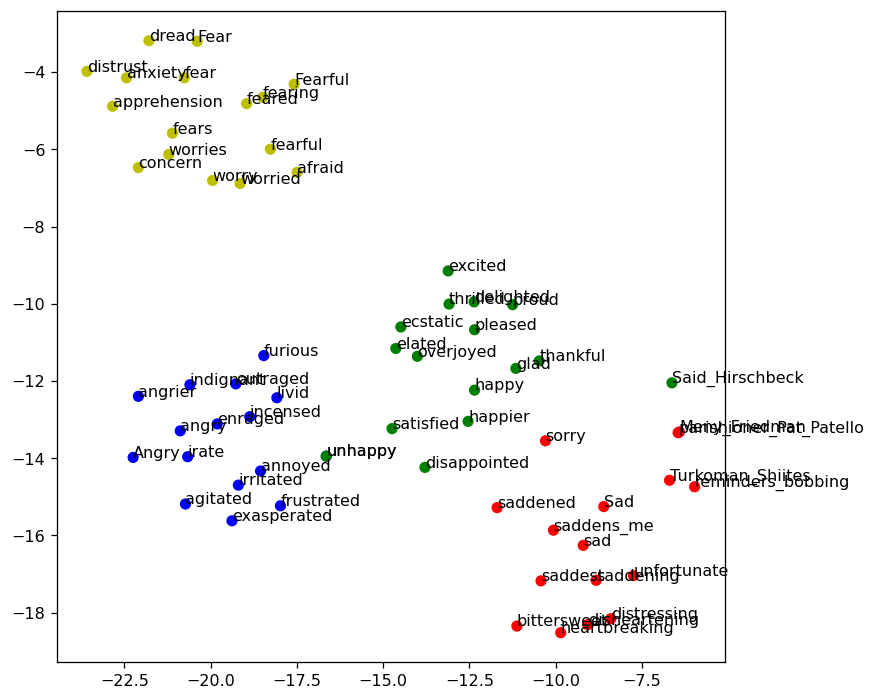

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()